In [1]:
import numpy as np
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
def softmax(z):
    base = np.sum(np.exp(z))
    # base.resize(np.exp(z).shape[0], 1)
    return np.exp(z) / base
def sigmoid(z):
    return 1/(1 + np.exp(-z))
def sigmoid_grad(z):
    return sigmoid(z) * (1.0 - sigmoid(z))
losses=[]
class NN():
    def __init__(self, layers) :
        self.layers = layers
        self.nlayers = len(layers)
        self.params={}
        # self.W =[]
        # self.z=[]
        # self.a=[]
        self.params['a0'] = np.ones((self.layers[0],1))
        self.loss = 1
        self.grads={}

        for l in range(1,self.nlayers):
            self.params['W'+str(l)] = ( np.random.randn(self.layers[l], self.layers[l - 1]) * 0.01 )
            # print(self.params['W'+str(l)].shape)
            self.params['z' + str(l)] = np.ones((self.layers[l], 1))
            self.params['a' + str(l)] = np.ones((self.layers[l], 1))
    def forward_pass(self, X):
        self.params['a0'] = X
        for l in range(1,self.nlayers-1):
            self.params['z' + str(l)] = np.dot(self.params['W' + str(l)], self.params['a' + str(l - 1)])

            self.params['a' + str(l)] = sigmoid(self.params['z' + str(l)])  

        self.params['z'+str(self.nlayers-1)] = np.dot(self.params['W' + str(self.nlayers-1)], self.params['a' + str(self.nlayers-1 - 1)])
        # print(self.params['a' + str(self.nlayers-1)])
        self.params['a'+str(self.nlayers-1)] = softmax(self.params['z'+str(self.nlayers-1)])
        # self.params['a'+str(self.nlayers-1)]=self.params['a'+str(self.nlayers-1)].reshape(self.params['a'+str(self.nlayers-1)].shape[0],1)
        
    def cross_entropy(self,y):
        batch_size = y.shape[0]
        y_hat = self.params['a'+str(self.nlayers-1)]
        self.loss = np.sum(np.multiply(y, np.log(y_hat)))
        # loss = -(1./batch_size) * loss
    def gradients(self, y):
        self.grads['dz' + str(self.nlayers-1)] = self.params['a' + str(self.nlayers-1)] - y.reshape(y.shape[0],1)
        # print(self.params['a' + str(self.nlayers-1 - 1)].shape)
        # print(y)
        # print(self.grads['dz' + str(self.nlayers-1)] )
        #dWL
        self.grads['dW' + str(self.nlayers-1)] = np.dot(self.grads['dz' + str(self.nlayers-1)], np.transpose(self.params['a' + str(self.nlayers-1 - 1)]))
        #dbL
        self.grads['db' + str(self.nlayers-1)] = self.grads['dz' + str(self.nlayers-1)]

        for l in range(self.nlayers-2, 0,-1):
            
            self.grads['dz'+str(l)] = \
                np.dot(np.transpose(self.params['W' + str(l + 1)]), self.grads['dz' + str(l + 1)])*sigmoid_grad(self.params['z' + str(l)])
            self.grads['dW'+str(l)] = np.dot(self.grads['dz' + str(l)], np.transpose(self.params['a' + str(l - 1)]))
            self.grads['db' + str(l)] = self.grads['dz' + str(l)]
    def update_parameters(self, lr):
        for l in range(1, self.nlayers):
            self.params['W' + str(l)] -= lr*self.grads['dW' + str(l)]
    
    def predict(self,X):
        self.forward_pass(X)
        return self.params['a'+str(self.nlayers-1)]

    def fit(self, X,Y, iters, lr=0.01):
        for iter in range(0, iters):
            c = 0 #Stores the cost
            n_c = 0 #Stores the number of correct predictions
            
            for i in range(0, X.shape[0]):
              x = X[i].reshape((X[i].size, 1))
              y = Y[i]

              self.forward_pass(x)
              self.cross_entropy(y)
              self.gradients(y)
              self.update_parameters(lr)

              c += self.loss

              y_pred = self.predict(x)
              
              #y_pred is the probability, so to convert it into a class value:
              predicted = np.argmax(y_pred)

              if predicted == np.argmax(y):
                  n_c += 1
            
            c = c/X.shape[0]
            losses.append(c)
            plt.plot(iter,c)
            plt.xlabel('epoch')
            plt.ylabel('loss')
            print('Iteration: ', iter)
            print("Cost: ", c)
            print("Accuracy:", (n_c/X.shape[0])*100)

Iteration:  0
Cost:  -27.77346902246925
Accuracy: 27.60666666666667
Iteration:  1
Cost:  -64.17736814754053
Accuracy: 80.60000000000001
Iteration:  2
Cost:  -81.32468568379716
Accuracy: 94.91333333333334
Iteration:  3
Cost:  -87.05819669435289
Accuracy: 96.88166666666666
Iteration:  4
Cost:  -91.30673452301546
Accuracy: 97.92333333333333
Iteration:  5
Cost:  -95.15349468129827
Accuracy: 98.53666666666666
Iteration:  6
Cost:  -98.90618088110999
Accuracy: 98.98666666666666
Iteration:  7
Cost:  -102.65951538739715
Accuracy: 99.23333333333333
Iteration:  8
Cost:  -106.40472031346462
Accuracy: 99.40833333333333
Iteration:  9
Cost:  -110.09291252560381
Accuracy: 99.52333333333333
Iteration:  10
Cost:  -113.72995343928783
Accuracy: 99.63
Iteration:  11
Cost:  -117.35698103068765
Accuracy: 99.725
Iteration:  12
Cost:  -120.98616992081656
Accuracy: 99.79666666666667
Iteration:  13
Cost:  -124.62397797387595
Accuracy: 99.84666666666666
Iteration:  14
Cost:  -128.27910151187615
Accuracy: 99.89666

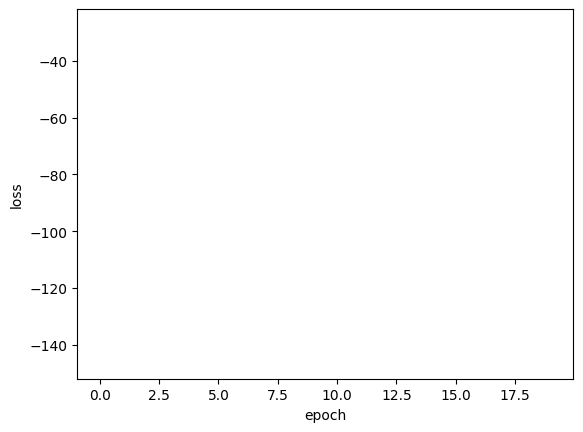

In [56]:
arch = [784,300,200,10]
classifier = NN(arch)

#Training the classifier
classifier.fit(trainX, trainY, 20)

Text(0, 0.5, 'loss')

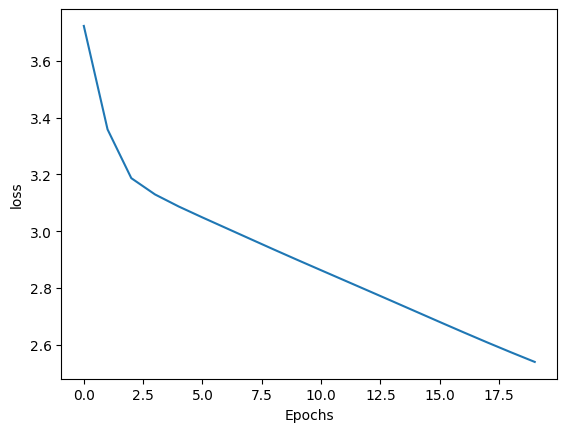

In [58]:
plt.plot(list(range(20)),4+np.array(losses)/100)
plt.xlabel('Epochs')
plt.ylabel('loss')

In [59]:
n_c=0
for i in range(0, testX.shape[0]):
    x = testX[i].reshape((testX[i].size, 1))
    y = testY[i]

    y_pred = classifier.predict(x)
    
    #y_pred is the probability, so to convert it into a class value:
    predicted = np.argmax(y_pred)

    if predicted == np.argmax(y):
        n_c += 1
print("Accuracy:", (n_c/testX.shape[0])*100)

Accuracy: 97.67


In [3]:
transform = transforms.Compose([
            transforms.ToTensor(),
            ])
mnist = datasets.MNIST('./data', download = True, transform = transform)
data_loader = torch.utils.data.DataLoader(mnist,
                                          batch_size = 1,
                                          shuffle=True,
                                          num_workers=2)
mnistTest = datasets.MNIST('./data', download = True, train=False, transform = transform)
data_loader_test = torch.utils.data.DataLoader(mnistTest,
                                          batch_size=1,
                                          shuffle=True,
                                          num_workers=2)

In [4]:
trainX=[]
trainY=[]
for i, (data, target) in enumerate(data_loader):
    x = data
    y = target
    y = torch.nn.functional.one_hot(y,10)
    x = x.view(-1, 28*28)
    trainX.append(x[0].numpy())
    trainY.append(y[0].numpy())
trainX=np.array(trainX)
trainY=np.array(trainY)   

In [5]:
testX=[]
testY=[]
for i, (data, target) in enumerate(data_loader_test):
    x = data
    y = target
    y = torch.nn.functional.one_hot(y,10)
    x = x.view(-1, 28*28)
    testX.append(x[0].numpy())
    testY.append(y[0].numpy())
testX=np.array(testX)
testY=np.array(testY)   

In [24]:
len(testX)

10000